<a href="https://colab.research.google.com/github/rafaelarruda/Dados_cancer_MachineLearning/blob/main/Dados_c%C3%A2ncer_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Taxa de acerto, uso de biblioteca**

Documentação: https://scikit-learn.org/stable/modules/model_evaluation.html


<font color = navy size=5>Lidando com dados relacionados ao Câncer

> Quantidade de exames 

> Diagnosticos: M = maligno, B = beniguino

In [1]:
import pandas as pd

resultados = pd.read_csv('/content/drive/MyDrive/DataScience/Dados/exames.csv')
resultados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


<font color=navy size=5>Quantidade de diagnostico

In [2]:
resultados.diagnostico.value_counts()

B    357
M    212
Name: diagnostico, dtype: int64

<font color=navy size=5>Informações

* 569 linhas
* 35 colunas
* exame_33 tem valores null
* 2° coluna é categorica, o resto númeral

In [3]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

<font color=navy size=5>Somando os valores null

In [4]:
resultados.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

Coluna exame_33, está com 73% dos dados faltando, não vale a pena preencher esse tanto de dados. Melhor solução, apagar a coluna. 

In [5]:
419/569

0.7363796133567663

<font color=navy size=5>API Sklearn 

> Importando o treino e teste

> usando o random do numpy para determinar uma aleatoriedade

In [6]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123456
random.seed(SEED)

exames = resultados.drop(columns=['id','diagnostico','exame_33'])
diagnostico = resultados.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(
    exames, diagnostico, test_size=0.3)

Quantidade de valores treinados

In [9]:
treino_y.value_counts()

B    247
M    151
Name: diagnostico, dtype: int64

<font color=navy size=5> Random Forest Classifier (Modelo de classificação)

> Gerou um score de 95%

In [10]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)
score = classificador.score(teste_x, teste_y)
print('Total de score:', score.round(2))


Total de score: 0.95


Verificar se o score deve um bom resultado, comparando com outro classificador

In [11]:
from sklearn.dummy import DummyClassifier

SEED=123456
random.seed(SEED)

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(treino_x, treino_y)
dummyScore = dummy.score(teste_x, teste_y)
print('Total de Dummy score: ', dummyScore.round(2))

Total de Dummy score:  0.64


<font color=navy size=5>Plotar gráfico com exames de melhor diagnostico

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

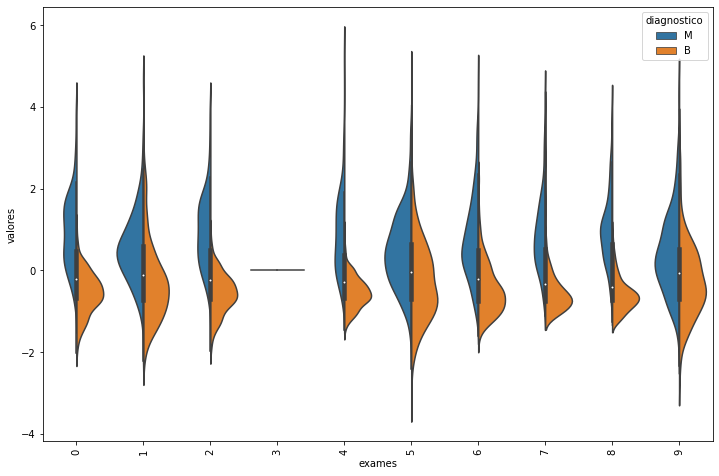

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Usando método StandardScaler
padronizar = StandardScaler()
padronizar.fit(exames)
exames = padronizar.transform(exames)

# Transformar em um Dataframe
exames = pd.DataFrame(exames)

# Juntado as variáveis, mostrando os 10 primeiros dados
dados_plot = pd.concat([diagnostico, exames.iloc[:,0:10]], axis=1)

# Transformar as colunas dos exames em uma única coluna
dados_plot = pd.melt(dados_plot, id_vars='diagnostico',
                     var_name = 'exames', 
                     value_name = 'valores')


# Dados do gráfico
plt.figure(figsize=(12,8))
sns.violinplot(x='exames', y='valores', hue='diagnostico', 
               data = dados_plot, split=True)

plt.xticks(rotation=90)

<font color=navy size=5>Verificar o exame número 3 que não plotar gráfico

In [14]:
exames[3]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    0.0
Name: 3, Length: 569, dtype: float64

<font color=navy size=5>Criar uma função para facilitar a plotagem do gráfico

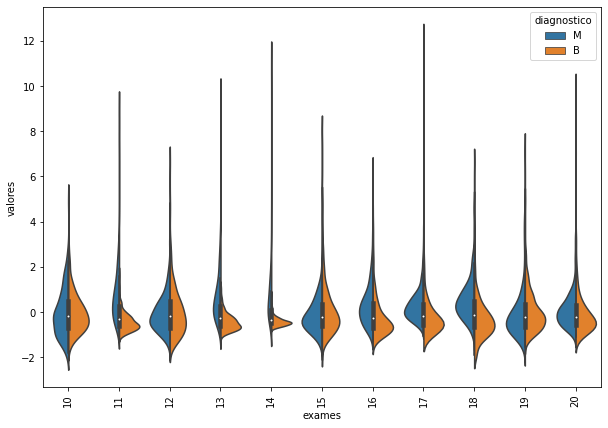

In [17]:
def grafico_violino(valores, inicio, fim):
  dados_plot = pd.concat([diagnostico,exames.iloc[:,inicio:fim]], axis = 1)
  dados_plot = pd.melt(dados_plot, id_vars='diagnostico',
                     var_name='exames',
                     value_name='valores')

  plt.figure(figsize=(10,7))
  sns.violinplot(x='exames', y='valores', hue='diagnostico',
               data = dados_plot, split=True)

  plt.xticks(rotation=90)

grafico_violino(exames, 10, 21)

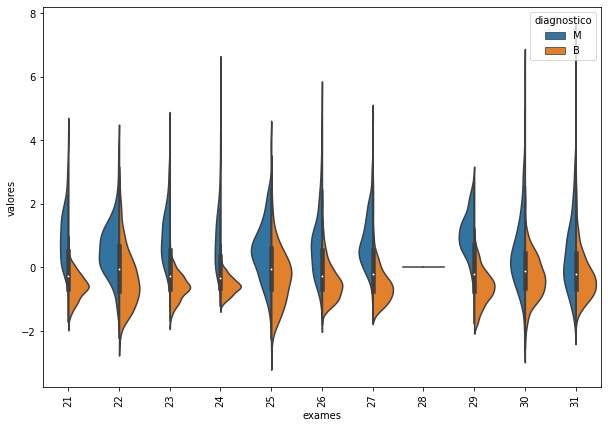

In [18]:
grafico_violino(exames, 21, 32)

<font color=navy size=5>Matriz de correlação

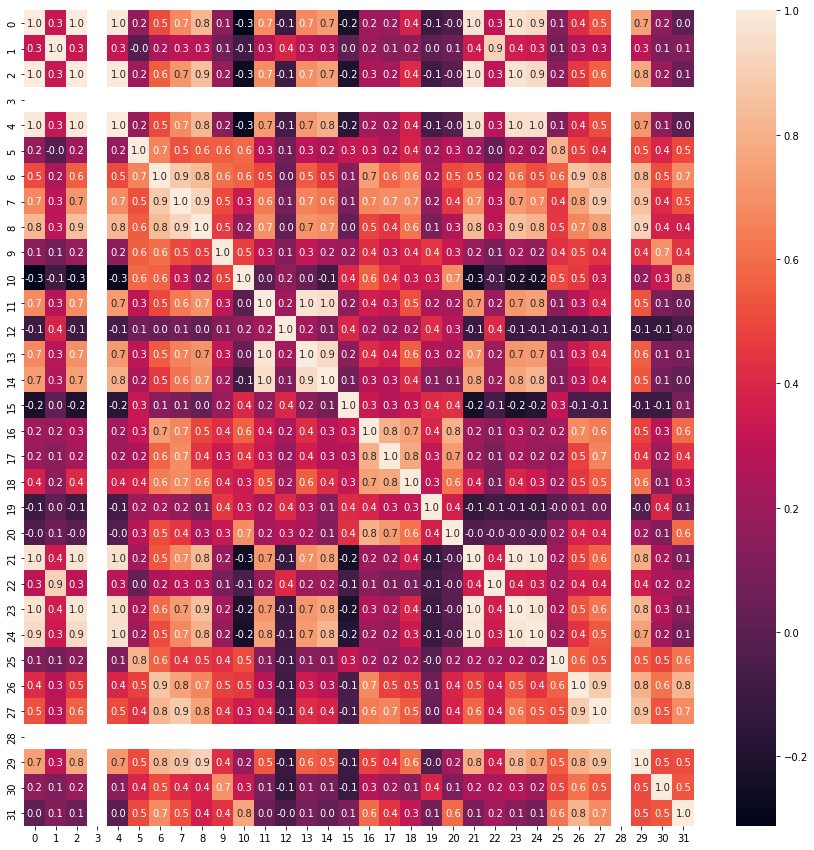

In [19]:
matriz = exames.corr()
plt.figure(figsize = (15,15))
sns.heatmap(matriz, annot=True, fmt = '.1f')

<font color=purple size=5>Método SelectKbest (94,74%)

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar = SelectKBest(chi2, k=5)
selecionar

SelectKBest(k=5, score_func=<function chi2 at 0x7f8bfcaf5c20>)

In [21]:
resultados.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

<font color=purple size=5>Excluindo colunas com valores string e nulls

In [22]:
valores = resultados.drop(columns = ['id','diagnostico','exame_33'])
valores.isnull().sum()

exame_1     0
exame_2     0
exame_3     0
exame_4     0
exame_5     0
exame_6     0
exame_7     0
exame_8     0
exame_9     0
exame_10    0
exame_11    0
exame_12    0
exame_13    0
exame_14    0
exame_15    0
exame_16    0
exame_17    0
exame_18    0
exame_19    0
exame_20    0
exame_21    0
exame_22    0
exame_23    0
exame_24    0
exame_25    0
exame_26    0
exame_27    0
exame_28    0
exame_29    0
exame_30    0
exame_31    0
exame_32    0
dtype: int64

<font color=purple size=5>Este método não aceitam valores null e negativos

In [23]:
SEED=123143
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico,
                                                        test_size=0.3)

selecionar.fit(treino_x, treino_y)
treino_k = selecionar.transform(treino_x)
teste_k = selecionar.transform(teste_x)

In [28]:
classificador = RandomForestClassifier(n_estimators=100, random_state=123143)
classificador.fit(treino_k, treino_y)
print('Resultado da classificação %.2f%%' %(classificador.score(teste_k, teste_y)*100))


Resultado da classificação 94.74%


<font color=purple size=5>Matriz de confusão

In [29]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, 
                                   classificador.predict(teste_k))
matriz_confusao

array([[111,   3],
       [  6,  51]])

[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

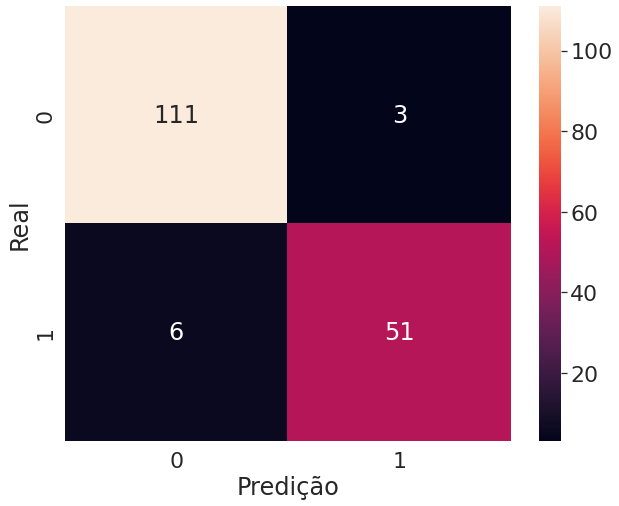

In [30]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt='d').set(xlabel = 'Predição', ylabel = 'Real')

<font color=teal size=5>Clustering

In [31]:
resultados.head(2)

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.8,103.78,1001.0,0.11840,0.27760,0.3001,...,184.6,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,103.78,1326.0,0.08474,0.07864,0.0869,...,158.8,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN


In [32]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

<font color=teal size=5>Tratando os valores null

In [33]:
resultados.fillna(resultados.median(), inplace=True)
resultados.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


id             0
diagnostico    0
exame_1        0
exame_2        0
exame_3        0
exame_4        0
exame_5        0
exame_6        0
exame_7        0
exame_8        0
exame_9        0
exame_10       0
exame_11       0
exame_12       0
exame_13       0
exame_14       0
exame_15       0
exame_16       0
exame_17       0
exame_18       0
exame_19       0
exame_20       0
exame_21       0
exame_22       0
exame_23       0
exame_24       0
exame_25       0
exame_26       0
exame_27       0
exame_28       0
exame_29       0
exame_30       0
exame_31       0
exame_32       0
exame_33       0
dtype: int64

<font color=teal size=5>Normalizar os dados

In [36]:
df = resultados.drop(columns=['id', 'diagnostico'])

from sklearn.preprocessing import Normalizer

df = Normalizer().fit_transform(df.values)
print(df)

[[7.91714393e-03 4.56809083e-03 5.40425389e-02 ... 2.02483486e-04
  5.23262042e-05 2.07748536e-04]
 [8.65748491e-03 7.47902318e-03 5.59348442e-02 ... 1.15741777e-04
  3.74666654e-05 1.98681783e-04]
 [9.35528795e-03 1.00964890e-02 6.17667564e-02 ... 1.71664070e-04
  4.16117887e-05 2.24291099e-04]
 ...
 [1.16131530e-02 1.96444178e-02 7.57653293e-02 ... 1.55168514e-04
  5.47077447e-05 3.30249869e-04]
 [9.22024138e-03 1.31276544e-02 6.27065931e-02 ... 1.82927799e-04
  5.55004821e-05 2.11288406e-04]
 [2.20793345e-02 6.98230500e-02 1.36345581e-01 ... 8.16878470e-04
  2.00278911e-04 1.34315104e-03]]


<font color=teal size=5>Clustering

In [61]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(df)

<font color=teal size=5>Validar o modelo

In [62]:
from sklearn import metrics

labels = kmeans.labels_
silhouette = metrics.silhouette_score(df, labels, metric='euclidean')
print(silhouette)

0.45687987586258655


<font color=teal size=5> Fazer uma comparação com números aleatórios

Criar um função (facilitador)

In [70]:
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300) # mesmos dados
  labels = kmeans.fit_predict(dataset) # previsão
  s = metrics.silhouette_score(dataset, labels, metric='euclidean')  
  return s

In [71]:
import numpy as np

random = np.random.rand(569,35)
s = clustering_algorithm(2, random)
print(s)

0.02535282982562515


<font color=teal size=5> Mais uma validação

In [75]:
set, set1, set2 = np.array_split(df, 3)
s = clustering_algorithm(2, set)
s1 = clustering_algorithm(2, set1)
s2 = clustering_algorithm(2, set2)
print(s)
print(s1)
print(s2)

0.4708803990021038
0.4656001439435224
0.354697939011223


<font color=teal size=5>Descrevendo os atributos

In [78]:
resultados['cluster'] = labels
resultados.groupby('cluster').describe()

id                                                           \
         count          mean           std     min        25%       50%   
cluster                                                                   
0        378.0  2.821008e+07  1.218769e+08  8913.0  874211.75  908192.0   
1        191.0  3.465006e+07  1.312432e+08  8670.0  859850.00  894618.0   

                                exame_1             ...  exame_32          \
               75%          max   count       mean  ...       75%     max   
cluster                                             ...                     
0        8812837.5  911320502.0   378.0  12.352616  ...  0.087885  0.1730   
1        8885845.0  911296202.0   191.0  17.639476  ...  0.100850  0.2075   

        exame_33                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0          378.0  0.477425  0.159524  0.008199  0.472064  0.472064  0.472064   
1          191.0  0.475895  0.135253  0.034114  0.472064  0.472064  0.472064   

                   
              max  
cluster            
0        0.980007  
1        0.995380  

[2 rows x 272 columns]

<font color=teal size=5>Analisando os valores

> Pegando os centroides

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

<font color=teal size=5>Calcular a variância

In [80]:
max = len(centroids[0])

for i in range(max):
  print(resultados.columns.values[i], '\n{:.4f}'.format(centroids[:,i].var()))

id 
0.0000
diagnostico 
0.0000
exame_1 
0.0004
exame_2 
0.0017
exame_3 
0.0010
exame_4 
0.0000
exame_5 
0.0000
exame_6 
0.0000
exame_7 
0.0000
exame_8 
0.0000
exame_9 
0.0000
exame_10 
0.0000
exame_11 
0.0000
exame_12 
0.0000
exame_13 
0.0000
exame_14 
0.0000
exame_15 
0.0000
exame_16 
0.0000
exame_17 
0.0000
exame_18 
0.0000
exame_19 
0.0000
exame_20 
0.0000
exame_21 
0.0001
exame_22 
0.0003
exame_23 
0.0012
exame_24 
0.0000
exame_25 
0.0000
exame_26 
0.0000
exame_27 
0.0000
exame_28 
0.0000
exame_29 
0.0000
exame_30 
0.0000
exame_31 
0.0000


<font color=teal size=5>Melhores variâncias

* exame_23
* exame_2
* exame_1 
* exame_22 

In [83]:
desc = resultados.groupby('cluster')['exame_1', 'exame_2','exame_22','exame_23']

n_exames = desc.size()
desc = desc.mean()
desc['n_exames'] = n_exames
print(desc)

           exame_1    exame_2   exame_22   exame_23  n_exames
cluster                                                      
0        12.352616  18.313995  13.572537  24.092831       378
1        17.639476  21.220524  21.606021  28.812827       191


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


> Câncer benigno = 378

> Câncer Maligno = 191

In [84]:
resultados.groupby('cluster')['diagnostico'].describe()

,count,unique,top,freq
cluster,,,,
0,378,2,B,345
1,191,2,M,179
